In [1]:
from pyqgraf import qgraf, model
from feynml.interface.qgraf import style
from feynmodel.interface.ufo import load_ufo_model
from feynmodel.interface.qgraf import feynmodel_to_qgraf
from xsdata.formats.dataclass.parsers import XmlParser
from pyfeyn2.feynmandiagram import FeynML
from feynamp.amplitude import square, square_parallel, multiply, feynman_diagram_to_string
import feynamp.amplitude as famp
import feynamp.vertex as fvert

import feynamp.form.momentum as m
from feynamp.form.color import apply_color, get_color
from feynamp.form.lorentz import apply_gammas, get_gammas, get_polarisation_sums, get_metrics
from feynamp.form.momentum import get_kinematics, get_onshell,get_mandelstamm_2_to_2, apply, apply_parallel
import logging
logger = logging.getLogger("feynamp")
logger.setLevel(logging.DEBUG)


	Please cite the following papers if you use this code:

      [1] Automatic Feynman graph generation J. Comput. Phys. 105 (1993) 279--289 https://doi.org/10.1006/jcph.1993.1074

      [2] Abusing Qgraf Nucl. Instrum. Methods Phys. Res. A 559 (2006) 220--223 https://doi.org/10.1016/j.nima.2005.11.151

      [3] Feynman graph generation and propagator mixing, I Comput. Phys. Commun. 269 (2021) 108103 https://doi.org/10.1016/j.cpc.2021.108103

	


In [2]:
fm = load_ufo_model("ufo_sm")
qfm = feynmodel_to_qgraf(fm, True, False)

In [3]:
qgraf.install("3.6.5")
xml_string = qgraf.run("g[p1], g[p2]", "g[p3], g[p4]",loops=0,loop_momentum="l",model = qfm, style=style)
print(xml_string)

<!--
 file generated by qgraf-3.6.5

  output= 'output.out' ;
  style= 'tmp.sty' ;
  model = 'tmp.model';
  in= g[p1], g[p2];
  out= g[p3], g[p4];
  loops= 0;
  loop_momentum= l;
  options= notadpole,onshell;


 You must add x= and y= with suitable vertex positions.
 Some lines may need manual bending to render properly.
-->
<feynml>
 
 <diagram
          id="Diagram1"
          incoming="2"
          outgoing="2"
          sign="+"
          symmmetry_factor="1"
 >


  <vertex id="Vert1">
  </vertex>



  <leg id="In1">
        <name>g</name>
        <sense>incoming</sense>
        <target>Vert1</target>
        <momentum>
          <name>p1</name>
        </momentum>
  </leg>

  <leg id="In2">
        <name>g</name>
        <sense>incoming</sense>
        <target>Vert1</target>
        <momentum>
          <name>p2</name>
        </momentum>
  </leg>



  <leg id="Out1">
        <name>g</name>
        <sense>outgoing</sense>
        <target>Vert1</target>
        <momentum>
         

In [4]:
parser = XmlParser()
fml = parser.from_string(xml_string, FeynML)

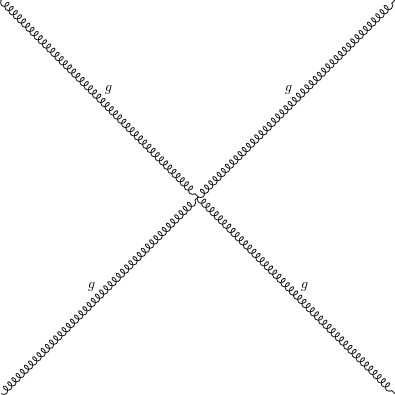

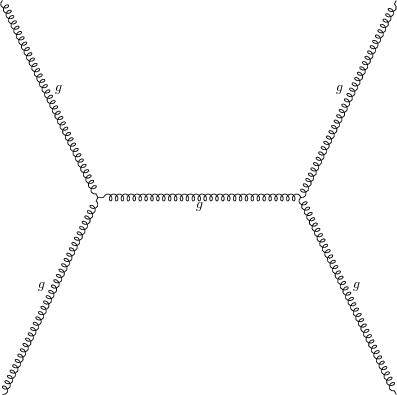

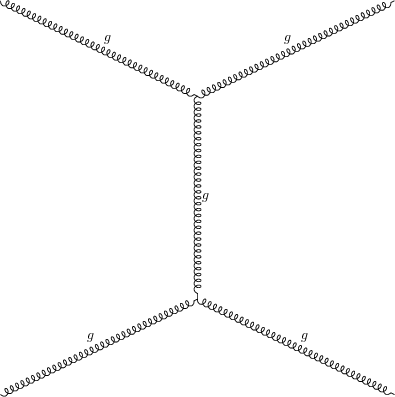

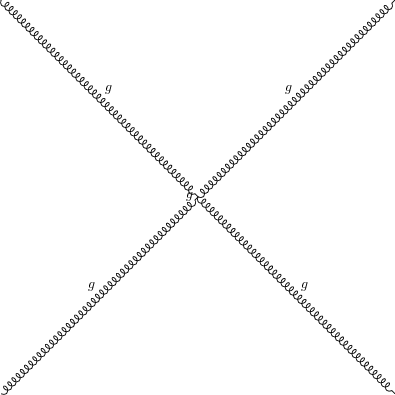

In [5]:
diagrams = fml.diagrams
#diagrams = diagrams[:1]
for fd in diagrams:
    fd.render()

In [6]:
from feynamp.form import amplitude
from feynamp.form import  lorentz,color
for fd in diagrams:
    amp = feynman_diagram_to_string(fd,fm)
    amp = lorentz.apply_metrics(amp)
    amp = color.apply_color_ids(amp)
    print(amp)
    display(amplitude.sympyfy_amplitude(amp).simplify())

INFO:feynamp:v.color=['f(-1,1,2)*f(3,4,-1)', 'f(-1,1,3)*f(2,4,-1)', 'f(-1,1,4)*f(2,3,-1)']
INFO:feynamp:v.lorentz=[VVVV1, VVVV3, VVVV4]
DEBUG:feynamp:lor='Metric(1,4)*Metric(2,3) - Metric(1,3)*Metric(2,4)'
DEBUG:feynamp:lor='Metric(1,4)*Metric(2,3) - Metric(1,2)*Metric(3,4)'
DEBUG:feynamp:lor='Metric(1,3)*Metric(2,4) - Metric(1,2)*Metric(3,4)'
DEBUG:feynamp:vertex_math=[('complex(0,1)*G**2', 'f(Glu9,GluIn1,GluOut1)*f(GluIn2,GluOut2,Glu9)', 'Metric(MuIn1,MuOut2)*Metric(MuIn2,MuOut1) - Metric(MuIn1,MuIn2)*Metric(MuOut1,MuOut2)'), ('complex(0,1)*G**2', 'f(Glu8,GluIn1,GluIn2)*f(GluOut1,GluOut2,Glu8)', 'Metric(MuIn1,MuOut2)*Metric(MuIn2,MuOut1) - Metric(MuIn1,MuOut1)*Metric(MuIn2,MuOut2)'), ('complex(0,1)*G**2', 'f(Glu10,GluIn1,GluOut2)*f(GluIn2,GluOut1,Glu10)', 'Metric(MuIn1,MuOut1)*Metric(MuIn2,MuOut2) - Metric(MuIn1,MuIn2)*Metric(MuOut1,MuOut2)')]
DEBUG:feynamp:ret='((complex(0,1)*G**2)*(f(Glu9,GluIn1,GluOut1)*f(GluIn2,GluOut2,Glu9))*(Metric(MuIn1,MuOut2)*Metric(MuIn2,MuOut1) - Metric(Mu

eps(MuOut2,PolIn1,Mom_p1)*eps(MuOut1,PolIn2,Mom_p2)*epsstar(MuOut2,PolOut2,Mom_p4)*epsstar(MuOut1,PolOut1,Mom_p3)*VA(GluIn1,Mom_p1)*VA(GluOut1,Mom_p3)*VA(GluIn2,Mom_p2)*VA(GluOut2,Mom_p4)*f(GluIn1,GluOut1,Glu9)*f(GluIn2,GluOut2,Glu9)*i_*G^2+eps(MuOut2,PolIn1,Mom_p1)*eps(MuOut1,PolIn2,Mom_p2)*epsstar(MuOut2,PolOut2,Mom_p4)*epsstar(MuOut1,PolOut1,Mom_p3)*VA(GluIn1,Mom_p1)*VA(GluOut1,Mom_p3)*VA(GluIn2,Mom_p2)*VA(GluOut2,Mom_p4)*f(GluIn1,GluIn2,Glu8)*f(GluOut1,GluOut2,Glu8)*i_*G^2-eps(MuOut1,PolIn1,Mom_p1)*eps(MuIn2,PolIn2,Mom_p2)*epsstar(MuOut1,PolOut1,Mom_p3)*epsstar(MuIn2,PolOut2,Mom_p4)*VA(GluIn1,Mom_p1)*VA(GluOut1,Mom_p3)*VA(GluIn2,Mom_p2)*VA(GluOut2,Mom_p4)*f(GluIn1,GluIn2,Glu8)*f(GluOut1,GluOut2,Glu8)*i_*G^2-eps(MuOut1,PolIn1,Mom_p1)*eps(MuIn2,PolIn2,Mom_p2)*epsstar(MuOut1,PolOut1,Mom_p3)*epsstar(MuIn2,PolOut2,Mom_p4)*VA(GluIn1,Mom_p1)*VA(GluOut1,Mom_p3)*VA(GluIn2,Mom_p2)*VA(GluOut2,Mom_p4)*f(GluIn1,GluOut2,Glu10)*f(GluOut1,GluIn2,Glu10)*i_*G^2-eps(MuIn2,PolIn1,Mom_p1)*eps(MuIn2,Pol

G**2*i_*(-epsilon_(mu_In2, PolIn1, p1)*epsilon_(mu_In2, PolIn2, p2)*epsilon_star(mu_Out1, PolOut2, p4)*f[GluIn1, GluOut1, Glu9]*f[GluIn2, GluOut2, Glu9] + epsilon_(mu_In2, PolIn1, p1)*epsilon_(mu_In2, PolIn2, p2)*epsilon_star(mu_Out1, PolOut2, p4)*f[GluIn1, GluOut2, Glu10]*f[GluOut1, GluIn2, Glu10] - epsilon_(mu_In2, PolIn2, p2)*epsilon_(mu_Out1, PolIn1, p1)*epsilon_star(mu_In2, PolOut2, p4)*f[GluIn1, GluIn2, Glu8]*f[GluOut1, GluOut2, Glu8] - epsilon_(mu_In2, PolIn2, p2)*epsilon_(mu_Out1, PolIn1, p1)*epsilon_star(mu_In2, PolOut2, p4)*f[GluIn1, GluOut2, Glu10]*f[GluOut1, GluIn2, Glu10] + epsilon_(mu_Out1, PolIn2, p2)*epsilon_(mu_Out2, PolIn1, p1)*epsilon_star(mu_Out2, PolOut2, p4)*f[GluIn1, GluIn2, Glu8]*f[GluOut1, GluOut2, Glu8] + epsilon_(mu_Out1, PolIn2, p2)*epsilon_(mu_Out2, PolIn1, p1)*epsilon_star(mu_Out2, PolOut2, p4)*f[GluIn1, GluOut1, Glu9]*f[GluIn2, GluOut2, Glu9])*VA(GluIn1, p1)*VA(GluIn2, p2)*VA(GluOut1, p3)*VA(GluOut2, p4)*epsilon_star(mu_Out1, PolOut1, p3)

INFO:feynamp:v.color=['f(1,2,3)']
INFO:feynamp:v.lorentz=[VVV1]
DEBUG:feynamp:lor='P(3,1)*Metric(1,2) - P(3,2)*Metric(1,2) - P(2,1)*Metric(1,3) + P(2,3)*Metric(1,3) + P(1,2)*Metric(2,3) - P(1,3)*Metric(2,3)'
DEBUG:feynamp:vertex_math=[('-G', 'f(GluInProp1,GluIn1,GluIn2)', '(P(MuIn2,-Mom_p1-Mom_p2))*Metric(MuInProp1,MuIn1) - (P(MuIn2,Mom_p1))*Metric(MuInProp1,MuIn1) - (P(MuIn1,-Mom_p1-Mom_p2))*Metric(MuInProp1,MuIn2) + (P(MuIn1,Mom_p2))*Metric(MuInProp1,MuIn2) + (P(MuInProp1,Mom_p1))*Metric(MuIn1,MuIn2) - (P(MuInProp1,Mom_p2))*Metric(MuIn1,MuIn2)')]
INFO:feynamp:v.color=['f(1,2,3)']
INFO:feynamp:v.lorentz=[VVV1]
DEBUG:feynamp:lor='P(3,1)*Metric(1,2) - P(3,2)*Metric(1,2) - P(2,1)*Metric(1,3) + P(2,3)*Metric(1,3) + P(1,2)*Metric(2,3) - P(1,3)*Metric(2,3)'
DEBUG:feynamp:vertex_math=[('-G', 'f(GluOutProp1,GluOut1,GluOut2)', '(-P(MuOut2,-Mom_p1-Mom_p2))*Metric(MuOutProp1,MuOut1) - (-P(MuOut2,Mom_p3))*Metric(MuOutProp1,MuOut1) - (-P(MuOut1,-Mom_p1-Mom_p2))*Metric(MuOutProp1,MuOut2) + (-P(MuOu

P(MuIn2,-Mom_p1-Mom_p2)*P(MuIn1,Mom_p3)*Denom(-Mom_p1-Mom_p2,0)*eps(MuIn2,PolIn2,Mom_p2)*eps(MuIn1,PolIn1,Mom_p1)*epsstar(MuOut1,PolOut1,Mom_p3)*epsstar(MuOut1,PolOut2,Mom_p4)*VA(GluIn1,Mom_p1)*VA(GluIn2,Mom_p2)*VA(GluOut1,Mom_p3)*VA(GluOut2,Mom_p4)*f(GluOutProp1,GluIn1,GluIn2)*f(GluOutProp1,GluOut1,GluOut2)*i_*G^2-P(MuIn2,-Mom_p1-Mom_p2)*P(MuIn1,Mom_p4)*Denom(-Mom_p1-Mom_p2,0)*eps(MuIn2,PolIn2,Mom_p2)*eps(MuIn1,PolIn1,Mom_p1)*epsstar(MuOut1,PolOut1,Mom_p3)*epsstar(MuOut1,PolOut2,Mom_p4)*VA(GluIn1,Mom_p1)*VA(GluIn2,Mom_p2)*VA(GluOut1,Mom_p3)*VA(GluOut2,Mom_p4)*f(GluOutProp1,GluIn1,GluIn2)*f(GluOutProp1,GluOut1,GluOut2)*i_*G^2-P(MuIn2,-Mom_p1-Mom_p2)*P(MuOut1,-Mom_p1-Mom_p2)*Denom(-Mom_p1-Mom_p2,0)*eps(MuIn2,PolIn2,Mom_p2)*eps(MuIn1,PolIn1,Mom_p1)*epsstar(MuIn1,PolOut2,Mom_p4)*epsstar(MuOut1,PolOut1,Mom_p3)*VA(GluIn1,Mom_p1)*VA(GluIn2,Mom_p2)*VA(GluOut1,Mom_p3)*VA(GluOut2,Mom_p4)*f(GluOutProp1,GluIn1,GluIn2)*f(GluOutProp1,GluOut1,GluOut2)*i_*G^2+P(MuIn2,-Mom_p1-Mom_p2)*P(MuOut1,Mom_p4)*

G**2*i_*(P(mu_In1, p2)*P(mu_Out1, p4)*epsilon_(mu_Out2, PolIn2, p2)*epsilon_star(mu_Out1, PolOut1, p3)*epsilon_star(mu_Out2, PolOut2, p4) - P(mu_In1, p2)*P(mu_Out1, -p1 - p2)*epsilon_(mu_Out2, PolIn2, p2)*epsilon_star(mu_Out1, PolOut1, p3)*epsilon_star(mu_Out2, PolOut2, p4) - P(mu_In1, p2)*P(mu_Out2, p3)*epsilon_(mu_Out1, PolIn2, p2)*epsilon_star(mu_Out1, PolOut1, p3)*epsilon_star(mu_Out2, PolOut2, p4) + P(mu_In1, p2)*P(mu_Out2, -p1 - p2)*epsilon_(mu_Out1, PolIn2, p2)*epsilon_star(mu_Out1, PolOut1, p3)*epsilon_star(mu_Out2, PolOut2, p4) + P(mu_In1, p2)*P(mu_OutProp1, p3)*epsilon_(mu_OutProp1, PolIn2, p2)*epsilon_star(mu_Out1, PolOut1, p3)*epsilon_star(mu_Out1, PolOut2, p4) - P(mu_In1, p2)*P(mu_OutProp1, p4)*epsilon_(mu_OutProp1, PolIn2, p2)*epsilon_star(mu_Out1, PolOut1, p3)*epsilon_star(mu_Out1, PolOut2, p4) - P(mu_In1, p3)*P(mu_In2, p1)*epsilon_(mu_In2, PolIn2, p2)*epsilon_star(mu_Out1, PolOut1, p3)*epsilon_star(mu_Out1, PolOut2, p4) + P(mu_In1, p3)*P(mu_In2, -p1 - p2)*epsilon_(mu_In

INFO:feynamp:v.color=['f(1,2,3)']
INFO:feynamp:v.lorentz=[VVV1]
DEBUG:feynamp:lor='P(3,1)*Metric(1,2) - P(3,2)*Metric(1,2) - P(2,1)*Metric(1,3) + P(2,3)*Metric(1,3) + P(1,2)*Metric(2,3) - P(1,3)*Metric(2,3)'
DEBUG:feynamp:vertex_math=[('-G', 'f(GluInProp1,GluIn1,GluOut1)', '(P(MuOut1,-Mom_p1+Mom_p3))*Metric(MuInProp1,MuIn1) - (P(MuOut1,Mom_p1))*Metric(MuInProp1,MuIn1) - (P(MuIn1,-Mom_p1+Mom_p3))*Metric(MuInProp1,MuOut1) + (-P(MuIn1,Mom_p3))*Metric(MuInProp1,MuOut1) + (P(MuInProp1,Mom_p1))*Metric(MuIn1,MuOut1) - (-P(MuInProp1,Mom_p3))*Metric(MuIn1,MuOut1)')]
INFO:feynamp:v.color=['f(1,2,3)']
INFO:feynamp:v.lorentz=[VVV1]
DEBUG:feynamp:lor='P(3,1)*Metric(1,2) - P(3,2)*Metric(1,2) - P(2,1)*Metric(1,3) + P(2,3)*Metric(1,3) + P(1,2)*Metric(2,3) - P(1,3)*Metric(2,3)'
DEBUG:feynamp:vertex_math=[('-G', 'f(GluOutProp1,GluIn2,GluOut2)', '(-P(MuOut2,-Mom_p1+Mom_p3))*Metric(MuOutProp1,MuIn2) - (P(MuOut2,Mom_p2))*Metric(MuOutProp1,MuIn2) - (-P(MuIn2,-Mom_p1+Mom_p3))*Metric(MuOutProp1,MuOut2) + (-P(

-P(MuOut1,-Mom_p1+Mom_p3)*P(MuIn1,Mom_p2)*Denom(-Mom_p1+Mom_p3,0)*eps(MuIn1,PolIn1,Mom_p1)*eps(MuIn2,PolIn2,Mom_p2)*epsstar(MuOut1,PolOut1,Mom_p3)*epsstar(MuIn2,PolOut2,Mom_p4)*VA(GluIn1,Mom_p1)*VA(GluOut1,Mom_p3)*VA(GluIn2,Mom_p2)*VA(GluOut2,Mom_p4)*f(GluOutProp1,GluIn1,GluOut1)*f(GluOutProp1,GluIn2,GluOut2)*i_*G^2-P(MuOut1,-Mom_p1+Mom_p3)*P(MuIn1,Mom_p4)*Denom(-Mom_p1+Mom_p3,0)*eps(MuIn1,PolIn1,Mom_p1)*eps(MuIn2,PolIn2,Mom_p2)*epsstar(MuOut1,PolOut1,Mom_p3)*epsstar(MuIn2,PolOut2,Mom_p4)*VA(GluIn1,Mom_p1)*VA(GluOut1,Mom_p3)*VA(GluIn2,Mom_p2)*VA(GluOut2,Mom_p4)*f(GluOutProp1,GluIn1,GluOut1)*f(GluOutProp1,GluIn2,GluOut2)*i_*G^2-P(MuOut1,-Mom_p1+Mom_p3)*P(MuIn2,-Mom_p1+Mom_p3)*Denom(-Mom_p1+Mom_p3,0)*eps(MuIn1,PolIn1,Mom_p1)*eps(MuIn2,PolIn2,Mom_p2)*epsstar(MuOut1,PolOut1,Mom_p3)*epsstar(MuIn1,PolOut2,Mom_p4)*VA(GluIn1,Mom_p1)*VA(GluOut1,Mom_p3)*VA(GluIn2,Mom_p2)*VA(GluOut2,Mom_p4)*f(GluOutProp1,GluIn1,GluOut1)*f(GluOutProp1,GluIn2,GluOut2)*i_*G^2+P(MuOut1,-Mom_p1+Mom_p3)*P(MuIn2,Mom_p4)

G**2*i_*(P(mu_In1, p2)*P(mu_Out1, p1)*epsilon_(mu_In2, PolIn2, p2)*epsilon_star(mu_In2, PolOut2, p4)*epsilon_star(mu_Out1, PolOut1, p3) - P(mu_In1, p2)*P(mu_Out1, -p1 + p3)*epsilon_(mu_In2, PolIn2, p2)*epsilon_star(mu_In2, PolOut2, p4)*epsilon_star(mu_Out1, PolOut1, p3) - P(mu_In1, p3)*P(mu_In2, p4)*epsilon_(mu_In2, PolIn2, p2)*epsilon_star(mu_Out2, PolOut1, p3)*epsilon_star(mu_Out2, PolOut2, p4) + P(mu_In1, p3)*P(mu_In2, -p1 + p3)*epsilon_(mu_In2, PolIn2, p2)*epsilon_star(mu_Out2, PolOut1, p3)*epsilon_star(mu_Out2, PolOut2, p4) - P(mu_In1, p3)*P(mu_Out2, p2)*epsilon_(mu_In2, PolIn2, p2)*epsilon_star(mu_In2, PolOut1, p3)*epsilon_star(mu_Out2, PolOut2, p4) - P(mu_In1, p3)*P(mu_Out2, -p1 + p3)*epsilon_(mu_In2, PolIn2, p2)*epsilon_star(mu_In2, PolOut1, p3)*epsilon_star(mu_Out2, PolOut2, p4) + P(mu_In1, p3)*P(mu_OutProp1, p2)*epsilon_(mu_In2, PolIn2, p2)*epsilon_star(mu_In2, PolOut2, p4)*epsilon_star(mu_OutProp1, PolOut1, p3) + P(mu_In1, p3)*P(mu_OutProp1, p4)*epsilon_(mu_In2, PolIn2, p2)*

INFO:feynamp:v.color=['f(1,2,3)']
INFO:feynamp:v.lorentz=[VVV1]
DEBUG:feynamp:lor='P(3,1)*Metric(1,2) - P(3,2)*Metric(1,2) - P(2,1)*Metric(1,3) + P(2,3)*Metric(1,3) + P(1,2)*Metric(2,3) - P(1,3)*Metric(2,3)'
DEBUG:feynamp:vertex_math=[('-G', 'f(GluInProp1,GluIn1,GluOut2)', '(P(MuOut2,-Mom_p1+Mom_p4))*Metric(MuInProp1,MuIn1) - (P(MuOut2,Mom_p1))*Metric(MuInProp1,MuIn1) - (P(MuIn1,-Mom_p1+Mom_p4))*Metric(MuInProp1,MuOut2) + (-P(MuIn1,Mom_p4))*Metric(MuInProp1,MuOut2) + (P(MuInProp1,Mom_p1))*Metric(MuIn1,MuOut2) - (-P(MuInProp1,Mom_p4))*Metric(MuIn1,MuOut2)')]
INFO:feynamp:v.color=['f(1,2,3)']
INFO:feynamp:v.lorentz=[VVV1]
DEBUG:feynamp:lor='P(3,1)*Metric(1,2) - P(3,2)*Metric(1,2) - P(2,1)*Metric(1,3) + P(2,3)*Metric(1,3) + P(1,2)*Metric(2,3) - P(1,3)*Metric(2,3)'
DEBUG:feynamp:vertex_math=[('-G', 'f(GluOutProp1,GluIn2,GluOut1)', '(-P(MuOut1,-Mom_p1+Mom_p4))*Metric(MuOutProp1,MuIn2) - (P(MuOut1,Mom_p2))*Metric(MuOutProp1,MuIn2) - (-P(MuIn2,-Mom_p1+Mom_p4))*Metric(MuOutProp1,MuOut1) + (-P(

-P(MuOut2,-Mom_p1+Mom_p4)*P(MuIn1,Mom_p2)*Denom(-Mom_p1+Mom_p4,0)*eps(MuIn1,PolIn1,Mom_p1)*eps(MuIn2,PolIn2,Mom_p2)*epsstar(MuOut2,PolOut2,Mom_p4)*epsstar(MuIn2,PolOut1,Mom_p3)*VA(GluIn1,Mom_p1)*VA(GluOut2,Mom_p4)*VA(GluIn2,Mom_p2)*VA(GluOut1,Mom_p3)*f(GluOutProp1,GluIn1,GluOut2)*f(GluOutProp1,GluIn2,GluOut1)*i_*G^2-P(MuOut2,-Mom_p1+Mom_p4)*P(MuIn1,Mom_p3)*Denom(-Mom_p1+Mom_p4,0)*eps(MuIn1,PolIn1,Mom_p1)*eps(MuIn2,PolIn2,Mom_p2)*epsstar(MuOut2,PolOut2,Mom_p4)*epsstar(MuIn2,PolOut1,Mom_p3)*VA(GluIn1,Mom_p1)*VA(GluOut2,Mom_p4)*VA(GluIn2,Mom_p2)*VA(GluOut1,Mom_p3)*f(GluOutProp1,GluIn1,GluOut2)*f(GluOutProp1,GluIn2,GluOut1)*i_*G^2-P(MuOut2,-Mom_p1+Mom_p4)*P(MuIn2,-Mom_p1+Mom_p4)*Denom(-Mom_p1+Mom_p4,0)*eps(MuIn1,PolIn1,Mom_p1)*eps(MuIn2,PolIn2,Mom_p2)*epsstar(MuOut2,PolOut2,Mom_p4)*epsstar(MuIn1,PolOut1,Mom_p3)*VA(GluIn1,Mom_p1)*VA(GluOut2,Mom_p4)*VA(GluIn2,Mom_p2)*VA(GluOut1,Mom_p3)*f(GluOutProp1,GluIn1,GluOut2)*f(GluOutProp1,GluIn2,GluOut1)*i_*G^2+P(MuOut2,-Mom_p1+Mom_p4)*P(MuIn2,Mom_p3)

G**2*i_*(P(mu_In1, p2)*P(mu_Out2, p1)*epsilon_(mu_In2, PolIn2, p2)*epsilon_star(mu_In2, PolOut1, p3)*epsilon_star(mu_Out2, PolOut2, p4) - P(mu_In1, p2)*P(mu_Out2, -p1 + p4)*epsilon_(mu_In2, PolIn2, p2)*epsilon_star(mu_In2, PolOut1, p3)*epsilon_star(mu_Out2, PolOut2, p4) + P(mu_In1, p3)*P(mu_Out2, p1)*epsilon_(mu_In2, PolIn2, p2)*epsilon_star(mu_In2, PolOut1, p3)*epsilon_star(mu_Out2, PolOut2, p4) - P(mu_In1, p3)*P(mu_Out2, -p1 + p4)*epsilon_(mu_In2, PolIn2, p2)*epsilon_star(mu_In2, PolOut1, p3)*epsilon_star(mu_Out2, PolOut2, p4) - P(mu_In1, p4)*P(mu_In2, p3)*epsilon_(mu_In2, PolIn2, p2)*epsilon_star(mu_Out1, PolOut1, p3)*epsilon_star(mu_Out1, PolOut2, p4) + P(mu_In1, p4)*P(mu_In2, -p1 + p4)*epsilon_(mu_In2, PolIn2, p2)*epsilon_star(mu_Out1, PolOut1, p3)*epsilon_star(mu_Out1, PolOut2, p4) - P(mu_In1, p4)*P(mu_Out1, p2)*epsilon_(mu_In2, PolIn2, p2)*epsilon_star(mu_In2, PolOut2, p4)*epsilon_star(mu_Out1, PolOut1, p3) - P(mu_In1, p4)*P(mu_Out1, -p1 + p4)*epsilon_(mu_In2, PolIn2, p2)*epsilo

In [7]:
s2 = square_parallel(diagrams,fm,tag=False)

INFO:feynamp:v.color=['f(-1,1,2)*f(3,4,-1)', 'f(-1,1,3)*f(2,4,-1)', 'f(-1,1,4)*f(2,3,-1)']
INFO:feynamp:v.lorentz=[VVVV1, VVVV3, VVVV4]
DEBUG:feynamp:lor='Metric(1,4)*Metric(2,3) - Metric(1,3)*Metric(2,4)'
DEBUG:feynamp:lor='Metric(1,4)*Metric(2,3) - Metric(1,2)*Metric(3,4)'
DEBUG:feynamp:lor='Metric(1,3)*Metric(2,4) - Metric(1,2)*Metric(3,4)'
DEBUG:feynamp:vertex_math=[('complex(0,1)*G**2', 'f(Glu27,GluIn1,GluOut1)*f(GluIn2,GluOut2,Glu27)', 'Metric(MuIn1,MuOut2)*Metric(MuIn2,MuOut1) - Metric(MuIn1,MuIn2)*Metric(MuOut1,MuOut2)'), ('complex(0,1)*G**2', 'f(Glu26,GluIn1,GluIn2)*f(GluOut1,GluOut2,Glu26)', 'Metric(MuIn1,MuOut2)*Metric(MuIn2,MuOut1) - Metric(MuIn1,MuOut1)*Metric(MuIn2,MuOut2)'), ('complex(0,1)*G**2', 'f(Glu28,GluIn1,GluOut2)*f(GluIn2,GluOut1,Glu28)', 'Metric(MuIn1,MuOut1)*Metric(MuIn2,MuOut2) - Metric(MuIn1,MuIn2)*Metric(MuOut1,MuOut2)')]
DEBUG:feynamp:ret='((complex(0,1)*G**2)*(f(Glu27,GluIn1,GluOut1)*f(GluIn2,GluOut2,Glu27))*(Metric(MuIn1,MuOut2)*Metric(MuIn2,MuOut1) - Met

In [8]:
s2

['(((complex(0,1)*G**2)*(f(Glu27,GluIn1,GluOut1)*f(GluIn2,GluOut2,Glu27))*(Metric(MuIn1,MuOut2)*Metric(MuIn2,MuOut1) - Metric(MuIn1,MuIn2)*Metric(MuOut1,MuOut2)) + (complex(0,1)*G**2)*(f(Glu26,GluIn1,GluIn2)*f(GluOut1,GluOut2,Glu26))*(Metric(MuIn1,MuOut2)*Metric(MuIn2,MuOut1) - Metric(MuIn1,MuOut1)*Metric(MuIn2,MuOut2)) + (complex(0,1)*G**2)*(f(Glu28,GluIn1,GluOut2)*f(GluIn2,GluOut1,Glu28))*(Metric(MuIn1,MuOut1)*Metric(MuIn2,MuOut2) - Metric(MuIn1,MuIn2)*Metric(MuOut1,MuOut2))) * (VA(GluIn1,Mom_p1)*eps(MuIn1,PolIn1,Mom_p1)) * (VA(GluIn2,Mom_p2)*eps(MuIn2,PolIn2,Mom_p2)) * (VA(GluOut1,Mom_p3)*eps_star(MuOut1,PolOut1,Mom_p3)) * (VA(GluOut2,Mom_p4)*eps_star(MuOut2,PolOut2,Mom_p4)))*(((complex(0,-1)*G**2)*(f(Glu50,GluLeg45,GluLeg47)*f(GluLeg46,GluLeg48,Glu50))*(Metric(MuLeg45,MuLeg48)*Metric(MuLeg46,MuLeg47) - Metric(MuLeg45,MuLeg46)*Metric(MuLeg47,MuLeg48)) + (complex(0,-1)*G**2)*(f(Glu49,GluLeg45,GluLeg46)*f(GluLeg47,GluLeg48,Glu49))*(Metric(MuLeg45,MuLeg48)*Metric(MuLeg46,MuLeg47) - Met

In [9]:
fs = ""
#fs += get_color()
fs += get_polarisation_sums(fml.diagrams,fm)
#fs += get_gammas()
#fs += get_kinematics()
#fs += get_onshell(fml.diagrams,fm)
#fs += get_mandelstamm_2_to_2(fml.diagrams,fm,replace_u=True)
fs

DEBUG:feynamp:mom: Mom_p1, mom_n: Mom_p2
DEBUG:feynamp:mom: Mom_p2, mom_n: Mom_p1
DEBUG:feynamp:mom: Mom_p3, mom_n: Mom_p4
DEBUG:feynamp:mom: Mom_p4, mom_n: Mom_p3
DEBUG:feynamp:pol_sums: 
    id epsstar(Muc?,Polb?,Mom_p1) * eps(Mul?,Pold?,Mom_p1) = -Metric(Muc,Mul) 
    + (P(Muc,Mom_p1)*P(Mul,Mom_p2) +  P(Mul,Mom_p1)*P(Muc,Mom_p2))*Den(Mom_p2.Mom_p1) 
    - P(Muc,Mom_p1)*P(Mul,Mom_p1)*(Mom_p2.Mom_p2)*Den(Mom_p2.Mom_p1)*Den(Mom_p2.Mom_p1);
    
    id epsstar(Muc?,Polb?,Mom_p2) * eps(Mul?,Pold?,Mom_p2) = -Metric(Muc,Mul) 
    + (P(Muc,Mom_p2)*P(Mul,Mom_p1) +  P(Mul,Mom_p2)*P(Muc,Mom_p1))*Den(Mom_p1.Mom_p2) 
    - P(Muc,Mom_p2)*P(Mul,Mom_p2)*(Mom_p1.Mom_p1)*Den(Mom_p1.Mom_p2)*Den(Mom_p1.Mom_p2);
    
    id epsstar(Muc?,Polb?,Mom_p3) * eps(Mul?,Pold?,Mom_p3) = -Metric(Muc,Mul) 
    + (P(Muc,Mom_p3)*P(Mul,Mom_p4) +  P(Mul,Mom_p3)*P(Muc,Mom_p4))*Den(Mom_p4.Mom_p3) 
    - P(Muc,Mom_p3)*P(Mul,Mom_p3)*(Mom_p4.Mom_p4)*Den(Mom_p4.Mom_p3)*Den(Mom_p4.Mom_p3);
    
    id epsstar(Muc?,Polb?,Mom_p

'\n    id epsstar(Muc?,Polb?,Mom_p1) * eps(Mul?,Pold?,Mom_p1) = -Metric(Muc,Mul) \n    + (P(Muc,Mom_p1)*P(Mul,Mom_p2) +  P(Mul,Mom_p1)*P(Muc,Mom_p2))*Den(Mom_p2.Mom_p1) \n    - P(Muc,Mom_p1)*P(Mul,Mom_p1)*(Mom_p2.Mom_p2)*Den(Mom_p2.Mom_p1)*Den(Mom_p2.Mom_p1);\n    \n    id epsstar(Muc?,Polb?,Mom_p2) * eps(Mul?,Pold?,Mom_p2) = -Metric(Muc,Mul) \n    + (P(Muc,Mom_p2)*P(Mul,Mom_p1) +  P(Mul,Mom_p2)*P(Muc,Mom_p1))*Den(Mom_p1.Mom_p2) \n    - P(Muc,Mom_p2)*P(Mul,Mom_p2)*(Mom_p1.Mom_p1)*Den(Mom_p1.Mom_p2)*Den(Mom_p1.Mom_p2);\n    \n    id epsstar(Muc?,Polb?,Mom_p3) * eps(Mul?,Pold?,Mom_p3) = -Metric(Muc,Mul) \n    + (P(Muc,Mom_p3)*P(Mul,Mom_p4) +  P(Mul,Mom_p3)*P(Muc,Mom_p4))*Den(Mom_p4.Mom_p3) \n    - P(Muc,Mom_p3)*P(Mul,Mom_p3)*(Mom_p4.Mom_p4)*Den(Mom_p4.Mom_p3)*Den(Mom_p4.Mom_p3);\n    \n    id epsstar(Muc?,Polb?,Mom_p4) * eps(Mul?,Pold?,Mom_p4) = -Metric(Muc,Mul) \n    + (P(Muc,Mom_p4)*P(Mul,Mom_p3) +  P(Mul,Mom_p4)*P(Muc,Mom_p3))*Den(Mom_p3.Mom_p4) \n    - P(Muc,Mom_p4)*P(Mul,Mom_p4)*(Mo

In [10]:
%%time
from feynamp.form import apply_color_parallel
rs = apply_color_parallel(s2)

QUEUEING TASKS | :   0%|          | 0/16 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/16 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/16 [00:00<?, ?it/s]

CPU times: user 192 ms, sys: 95.9 ms, total: 288 ms
Wall time: 588 ms


In [11]:
rs

['6*Metric(MuIn1,MuOut2)*Metric(MuIn2,MuOut1)*Metric(MuLeg45,MuLeg48)*Metric(MuLeg46,MuLeg47)*eps(MuIn1,PolIn1,Mom_p1)*eps(MuIn2,PolIn2,Mom_p2)*eps(MuLeg48,PolLeg48,Mom_p4)*eps(MuLeg47,PolLeg47,Mom_p3)*epsstar(MuOut2,PolOut2,Mom_p4)*epsstar(MuOut1,PolOut1,Mom_p3)*epsstar(MuLeg45,PolLeg45,Mom_p1)*epsstar(MuLeg46,PolLeg46,Mom_p2)*G^4*Nc^3*Cf-3*Metric(MuIn1,MuOut2)*Metric(MuIn2,MuOut1)*Metric(MuLeg45,MuLeg46)*Metric(MuLeg48,MuLeg47)*eps(MuIn1,PolIn1,Mom_p1)*eps(MuIn2,PolIn2,Mom_p2)*eps(MuLeg48,PolLeg48,Mom_p4)*eps(MuLeg47,PolLeg47,Mom_p3)*epsstar(MuOut2,PolOut2,Mom_p4)*epsstar(MuOut1,PolOut1,Mom_p3)*epsstar(MuLeg45,PolLeg45,Mom_p1)*epsstar(MuLeg46,PolLeg46,Mom_p2)*G^4*Nc^3*Cf-3*Metric(MuIn1,MuOut2)*Metric(MuIn2,MuOut1)*Metric(MuLeg45,MuLeg47)*Metric(MuLeg48,MuLeg46)*eps(MuIn1,PolIn1,Mom_p1)*eps(MuIn2,PolIn2,Mom_p2)*eps(MuLeg48,PolLeg48,Mom_p4)*eps(MuLeg47,PolLeg47,Mom_p3)*epsstar(MuOut2,PolOut2,Mom_p4)*epsstar(MuOut1,PolOut1,Mom_p3)*epsstar(MuLeg45,PolLeg45,Mom_p1)*epsstar(MuLeg46,PolLeg4

In [12]:
%%time
fs = ""
fs += get_metrics()
fs += get_kinematics()
fs += get_onshell(fml.diagrams,fm)
fs += get_mandelstamm_2_to_2(fml.diagrams,fm)
fs += get_polarisation_sums(fml.diagrams,fm)
fs += get_gammas()
fs += get_kinematics()
fs += get_onshell(fml.diagrams,fm)
fs += get_mandelstamm_2_to_2(fml.diagrams,fm)
rs = apply_parallel(rs,fs)

DEBUG:feynamp:mom: Mom_p1, mom_n: Mom_p2
DEBUG:feynamp:mom: Mom_p2, mom_n: Mom_p1
DEBUG:feynamp:mom: Mom_p3, mom_n: Mom_p4
DEBUG:feynamp:mom: Mom_p4, mom_n: Mom_p3
DEBUG:feynamp:pol_sums: 
    id epsstar(Muc?,Polb?,Mom_p1) * eps(Mul?,Pold?,Mom_p1) = -Metric(Muc,Mul) 
    + (P(Muc,Mom_p1)*P(Mul,Mom_p2) +  P(Mul,Mom_p1)*P(Muc,Mom_p2))*Den(Mom_p2.Mom_p1) 
    - P(Muc,Mom_p1)*P(Mul,Mom_p1)*(Mom_p2.Mom_p2)*Den(Mom_p2.Mom_p1)*Den(Mom_p2.Mom_p1);
    
    id epsstar(Muc?,Polb?,Mom_p2) * eps(Mul?,Pold?,Mom_p2) = -Metric(Muc,Mul) 
    + (P(Muc,Mom_p2)*P(Mul,Mom_p1) +  P(Mul,Mom_p2)*P(Muc,Mom_p1))*Den(Mom_p1.Mom_p2) 
    - P(Muc,Mom_p2)*P(Mul,Mom_p2)*(Mom_p1.Mom_p1)*Den(Mom_p1.Mom_p2)*Den(Mom_p1.Mom_p2);
    
    id epsstar(Muc?,Polb?,Mom_p3) * eps(Mul?,Pold?,Mom_p3) = -Metric(Muc,Mul) 
    + (P(Muc,Mom_p3)*P(Mul,Mom_p4) +  P(Mul,Mom_p3)*P(Muc,Mom_p4))*Den(Mom_p4.Mom_p3) 
    - P(Muc,Mom_p3)*P(Mul,Mom_p3)*(Mom_p4.Mom_p4)*Den(Mom_p4.Mom_p3)*Den(Mom_p4.Mom_p3);
    
    id epsstar(Muc?,Polb?,Mom_p

QUEUEING TASKS | :   0%|          | 0/16 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/16 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/16 [00:00<?, ?it/s]

CPU times: user 284 ms, sys: 48.5 ms, total: 332 ms
Wall time: 28.8 s


In [13]:
rs

['216*G^4*Nc^3*Cf-108*Den(Mom_p1.Mom_p2)*G^4*Nc^3*Cf*mss+15*Den(Mom_p1.Mom_p2)^2*G^4*Nc^3*Cf*mss^2-3*Den(Mom_p1.Mom_p2)^2*Den(Mom_p4.Mom_p3)*G^4*Nc^3*Cf*mss*msu^2-3*Den(Mom_p1.Mom_p2)^2*Den(Mom_p4.Mom_p3)*G^4*Nc^3*Cf*mss*mst^2-6*Den(Mom_p1.Mom_p2)^2*Den(Mom_p4.Mom_p3)*G^4*Nc^3*Cf*mss^3+9/4*Den(Mom_p1.Mom_p2)^2*Den(Mom_p4.Mom_p3)^2*G^4*Nc^3*Cf*msu^4+3/2*Den(Mom_p1.Mom_p2)^2*Den(Mom_p4.Mom_p3)^2*G^4*Nc^3*Cf*mst^2*msu^2+9/4*Den(Mom_p1.Mom_p2)^2*Den(Mom_p4.Mom_p3)^2*G^4*Nc^3*Cf*mst^4-3/2*Den(Mom_p1.Mom_p2)^2*Den(Mom_p4.Mom_p3)^2*G^4*Nc^3*Cf*mss^2*msu^2-3/2*Den(Mom_p1.Mom_p2)^2*Den(Mom_p4.Mom_p3)^2*G^4*Nc^3*Cf*mss^2*mst^2+3/2*Den(Mom_p1.Mom_p2)^2*Den(Mom_p4.Mom_p3)^2*G^4*Nc^3*Cf*mss^4+12*Den(Mom_p1.Mom_p2)*Den(Mom_p4.Mom_p3)*G^4*Nc^3*Cf*msu^2+12*Den(Mom_p1.Mom_p2)*Den(Mom_p4.Mom_p3)*G^4*Nc^3*Cf*mst^2+48*Den(Mom_p1.Mom_p2)*Den(Mom_p4.Mom_p3)*G^4*Nc^3*Cf*mss^2-3*Den(Mom_p1.Mom_p2)*Den(Mom_p4.Mom_p3)^2*G^4*Nc^3*Cf*mss*msu^2-3*Den(Mom_p1.Mom_p2)*Den(Mom_p4.Mom_p3)^2*G^4*Nc^3*Cf*mss*mst^2-6*Den(

In [14]:
%%time
rr =m.apply_den(' + '.join(rs), get_onshell(fml.diagrams,fm) + get_mandelstamm_2_to_2(fml.diagrams,fm))

QUEUEING TASKS | :   0%|          | 0/6 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/6 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/6 [00:00<?, ?it/s]

CPU times: user 41.5 ms, sys: 13.4 ms, total: 54.9 ms
Wall time: 48.4 ms


In [15]:
len(rr)

90164

In [16]:
print(rr[0:100])

216*G^4*Nc^3*Cf-108*1/(1/2*mss)*G^4*Nc^3*Cf*mss+15*1/(1/2*mss)^2*G^4*Nc^3*Cf*mss^2-3*1/(1/2*mss)^2*1


In [17]:

#rr

In [18]:
import sympy
ret = sympy.simplify(
        sympy.parse_expr(
            rr
            .replace("^", "**")
            .replace("mss", "s")
            .replace("msu", "u")
            .replace("mst", "t")
        ).subs("Nc", "3").subs("Cf", "4/3") / 2 /2 /8 /8
    )
ret = ret.subs("s","-u-t").simplify()
ret

9*G**4*(t**6 + 3*t**5*u + 6*t**4*u**2 + 7*t**3*u**3 + 6*t**2*u**4 + 3*t*u**5 + u**6)/(2*t**2*u**2*(t**2 + 2*t*u + u**2))

In [19]:

ret.equals(ret.subs({"u": "t", "t":"u"},simultaneous=True))

True

In [20]:
import equation_database as edb

In [21]:
from equation_database import isbn_9780511628788 as ref
retX = ref.table_7_1_gg_gg
retX.equals(retX.subs({"s": "u", "u":"s"},simultaneous=True))

True

In [22]:
retX

-9*s*t/(2*u**2) - 9*s*u/(2*t**2) + 27/2 - 9*t*u/(2*s**2)

In [28]:
ret.subs("G", "1").equals(retX.subs("s","-u-t"))

True

In [27]:
(ret.subs("G", "1")* sympy.parse_expr("t**2*u**2*(u+t)**2")).simplify().expand()

9*t**6/2 + 27*t**5*u/2 + 27*t**4*u**2 + 63*t**3*u**3/2 + 27*t**2*u**4 + 27*t*u**5/2 + 9*u**6/2

In [24]:
(ref.table_7_1_gg_gg.subs(ref.u, -ref.s-ref.t)* sympy.parse_expr("s**4*t**2*(s+t)**2")).simplify().expand()

9*s**8/2 + 27*s**7*t/2 + 27*s**6*t**2 + 63*s**5*t**3/2 + 27*s**4*t**4 + 27*s**3*t**5/2 + 9*s**2*t**6/2